# Ch01. 머신러닝개요

**배울내용**
+ XGBoost
+ 데이터 랭글링
+ 회귀모형 만들기
+ 분류모형 만들기

## 1.1. XGBoost 소개

+ **부스팅**의 일반적인 아이디어는 **약한 학습기**를 반복적으로 더하며 오차를 개선하여, 강한 학습기로 바꾸는 것
+ **그레디언트 부스팅**의 핵심 아이디어는, **경사 하강법**을 이용해 잔여 오차를 최소화 하는 것
+ **XGBoost**는 **익스트림 그레디언트 부스팅**의 약자
    + **익스트림**은 정확도와 속도를 달성하기 위해 계산량을 극대화하는 것을 의미

### 1.1.1 머신러닝이란?
머신러닝은 빅데이터를 정확하고 실행 가능한 예측으로 변환하는 최고의 도구

## 1.2. 데이터 랭글링
데이터 랭글링은 머신러닝을 시작하기 전에 다양한 데이터 전처리 단계를 포함하는 광범위한 용어
+ 데이터 로딩, 데이터 정제, 데이터 분석, 데이터 조작이 모두 데이터 랭글링에 포함됨

### 1.2.1. 데이터셋1 - 자전거 대여

+ cnt = casual + registered


In [1]:
import pandas as pd
df_bikes = pd.read_csv('./bike_rentals.csv')
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 1.2.2. 데이터 이해하기
+ `.head()`
+ `.describe()`
+ `.info()`

In [2]:
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,730.000000,730.000000,731.000000,731.000000,731.000000,731.000000,730.000000,730.000000,728.000000,726.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500000,6.512329,0.028728,2.997264,0.682627,1.395349,0.495587,0.474512,0.627987,0.190476,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500343,3.448303,0.167155,2.004787,0.465773,0.544894,0.183094,0.163017,0.142331,0.077725,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.521562,0.134494,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499166,0.487364,0.627083,0.180971,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730104,0.233218,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [3]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     731 non-null    float64
 6   weekday     731 non-null    float64
 7   workingday  731 non-null    float64
 8   weathersit  731 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         728 non-null    float64
 12  windspeed   726 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 91.5+ KB


### 1.2.3. 결측치 처리하기

**누락된 값 개수**
+ `.isna().sum().sum()`

In [7]:
df_bikes.isna().sum()

instant       0
dteday        0
season        0
yr            1
mnth          1
holiday       0
weekday       0
workingday    0
weathersit    0
temp          1
atemp         1
hum           3
windspeed     5
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df_bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            1
mnth          1
holiday       0
weekday       0
workingday    0
weathersit    0
temp          1
atemp         1
hum           3
windspeed     5
casual        0
registered    0
cnt           0
dtype: int64

**누락된값출력**

In [9]:
df_bikes[df_bikes.isnull().any(axis=1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,NaN,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,NaN,203,1918,2121
128,129,2011-05-09,2.0,0.0,5.0,0.0,1.0,1.0,1,0.532500,0.525246,0.588750,NaN,664,3698,4362
129,130,2011-05-10,2.0,0.0,5.0,0.0,2.0,1.0,1,0.532500,0.522721,NaN,0.115671,694,4109,4803
213,214,2011-08-02,3.0,0.0,8.0,0.0,2.0,1.0,1,0.783333,0.707071,NaN,0.205850,801,4044,4845
298,299,2011-10-26,4.0,0.0,10.0,0.0,3.0,1.0,2,0.484167,0.472846,0.720417,NaN,404,3490,3894
388,389,2012-01-24,1.0,1.0,1.0,0.0,2.0,1.0,1,0.342500,0.349108,NaN,0.123767,439,3900,4339
528,529,2012-06-12,2.0,1.0,6.0,0.0,2.0,1.0,2,0.653333,0.597875,0.833333,NaN,477,4495,4972
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,NaN,NaN,0.823333,0.124379,892,3757,4649
730,731,2012-12-31,1.0,NaN,NaN,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


**결측치대체1**
+ `.fillna()` + `.median()`

In [18]:
# 1. median 이용
df_bikes['windspeed'].fillna(df_bikes['windspeed'].median(), inplace=True)  # mean(), mode() 이용가능
df_bikes.iloc[[56,81,128,298,528]]
# df_bikes[df_bikes.isnull().any(axis=1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,0.180971,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,0.180971,203,1918,2121
128,129,2011-05-09,2.0,0.0,5.0,0.0,1.0,1.0,1,0.532500,0.525246,0.588750,0.180971,664,3698,4362
298,299,2011-10-26,4.0,0.0,10.0,0.0,3.0,1.0,2,0.484167,0.472846,0.720417,0.180971,404,3490,3894
528,529,2012-06-12,2.0,1.0,6.0,0.0,2.0,1.0,2,0.653333,0.597875,0.833333,0.180971,477,4495,4972


**결측치대체2**
+ `.fillna()` + `groupby()` 로 group마다 다른 값으로 대체

In [20]:
# 2. groupby 이용 : transform()은 첫 번째 매개변수로 전달된 함수를 적용한 다음, 원본과 동일한 길이의 시리즈나 데이터 프레임을 반환함
df_bikes.groupby('season')['hum'].transform('median') # 각 season group의 hum 의 median값을 전체 길이 series로 반환함

df_bikes['hum'] = df_bikes['hum'].fillna(df_bikes.groupby('season')['hum'].transform('median'))
df_bikes.iloc[[129,213,388]]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
129,130,2011-05-10,2.0,0.0,5.0,0.0,2.0,1.0,1,0.532500,0.522721,0.646667,0.115671,694,4109,4803
213,214,2011-08-02,3.0,0.0,8.0,0.0,2.0,1.0,1,0.783333,0.707071,0.635833,0.205850,801,4044,4845
388,389,2012-01-24,1.0,1.0,1.0,0.0,2.0,1.0,1,0.342500,0.349108,0.543750,0.123767,439,3900,4339


In [22]:
df_bikes.groupby('season')['hum'].transform('median').value_counts()

0.635833    188
0.646667    184
0.543750    181
0.661042    178
Name: hum, dtype: int64

**결측치대체3**
+ `.fillna()` + `임의의값`

In [23]:
df_bikes[df_bikes['temp'].isna()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,NaN,NaN,0.823333,0.124379,892,3757,4649


In [25]:
# temp와 atemp의 평균을 계산합니다.
mean_temp = (df_bikes.iloc[700]['temp'] + df_bikes.iloc[702]['temp'])/2
mean_atemp = (df_bikes.iloc[700]['atemp'] + df_bikes.iloc[702]['atemp'])/2

# 누락된 값을 평균 온도로 대체합니다.
df_bikes['temp'].fillna((mean_temp), inplace=True)
df_bikes['atemp'].fillna((mean_atemp), inplace=True)
df_bikes.iloc[[701]]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,0.375417,0.38635,0.823333,0.124379,892,3757,4649


**결측치대체4** - 날짜추정
+ `pd.to_datetime()`

In [32]:
# 1. 'dteday' 열을 datetime 객체로 바꿉니다.
df_bikes['dteday'] = pd.to_datetime(df_bikes['dteday'])

# 2. mnth 결측치처리
df_bikes['mnth'] = df_bikes['dteday'].dt.month
df_bikes

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1.0,0.0,1,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1.0,0.0,1,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1.0,0.0,1,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1.0,0.0,1,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1.0,1.0,12,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1.0,1.0,12,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1.0,1.0,12,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1.0,1.0,12,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [36]:
# 3. yr 결측치처리
df_bikes['yr'] = df_bikes['yr'].fillna(df_bikes['dteday'].apply(lambda x: x.year - 2011))
df_bikes.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1.0,1.0,12,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1.0,1.0,12,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1.0,1.0,12,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1.0,1.0,12,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1.0,1.0,12,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


## 1.3. 회귀모형만들기

자전거 대여량인 **cnt**를 예측하는 모형을 만들어보자

cnt = registered + casual 이므로 2개 컬럼 생략

### 1.3.1. 데이터 저장하기

In [37]:
df_bikes = df_bikes.drop(['registered','casual'],axis=1)
df_bikes.to_csv('./bike_rentals_cleaned.csv', index=False)
print('저장 Done')

저장 Done


### 1.3.2. 데이터 나누기

In [57]:
# X와 y로 데이터를 나눕니다.
X = df_bikes.drop(['instant','dteday','cnt'], axis=1)
y = df_bikes.loc[:,'cnt']

# train_test_split 함수를 임포트합니다.
from sklearn.model_selection import train_test_split


# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train = X_train.sort_index()
y_train = y_train.sort_index()

In [58]:
X_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1.0,0.0,1,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446
1,1.0,0.0,1,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539
3,1.0,0.0,1,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296
4,1.0,0.0,1,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900
5,1.0,0.0,1,0.0,4.0,1.0,1,0.204348,0.233209,0.518261,0.089565
...,...,...,...,...,...,...,...,...,...,...,...
723,1.0,1.0,12,0.0,1.0,1.0,2,0.231304,0.258900,0.791304,0.077230
724,1.0,1.0,12,1.0,2.0,0.0,2,0.291304,0.294465,0.734783,0.168726
725,1.0,1.0,12,0.0,3.0,1.0,3,0.243333,0.220333,0.823333,0.316546
728,1.0,1.0,12,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383


### 1.3.3. 경고끄기

In [103]:
# 경고를 표시하지 않습니다.
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
xgb.set_config(verbosity=0)

### 1.3.4. 선형회귀모형 만들기

In [59]:
# LinearRegression 클래스를 임포트합니다.
from sklearn.linear_model import LinearRegression

# LinearRegression 모델 객체를 만듭니다.
lin_reg = LinearRegression()

# 훈련 데이터로 lin_reg 객체를 훈련합니다.
lin_reg.fit(X_train, y_train)

# lin_reg 객체를 사용해 X_test에 대한 예측값을 만듭니다.
y_pred = lin_reg.predict(X_test)

# mean_squared_error 함수를 임포트합니다.
from sklearn.metrics import mean_squared_error

# numpy를 임포트합니다.
import numpy as np

# mean_squared_error 함수로 평균 제곱 오차를 계산합니다.
mse = mean_squared_error(y_test, y_pred)

# 평균 제곱근 오차를 계산합니다.
rmse = np.sqrt(mse)

# 평균 제곱근 오차를 출력합니다.
print("RMSE: %0.2f" % (rmse))

RMSE: 842.04


In [60]:
df_bikes['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

### 1.3.5. 선형회귀결과 시각화

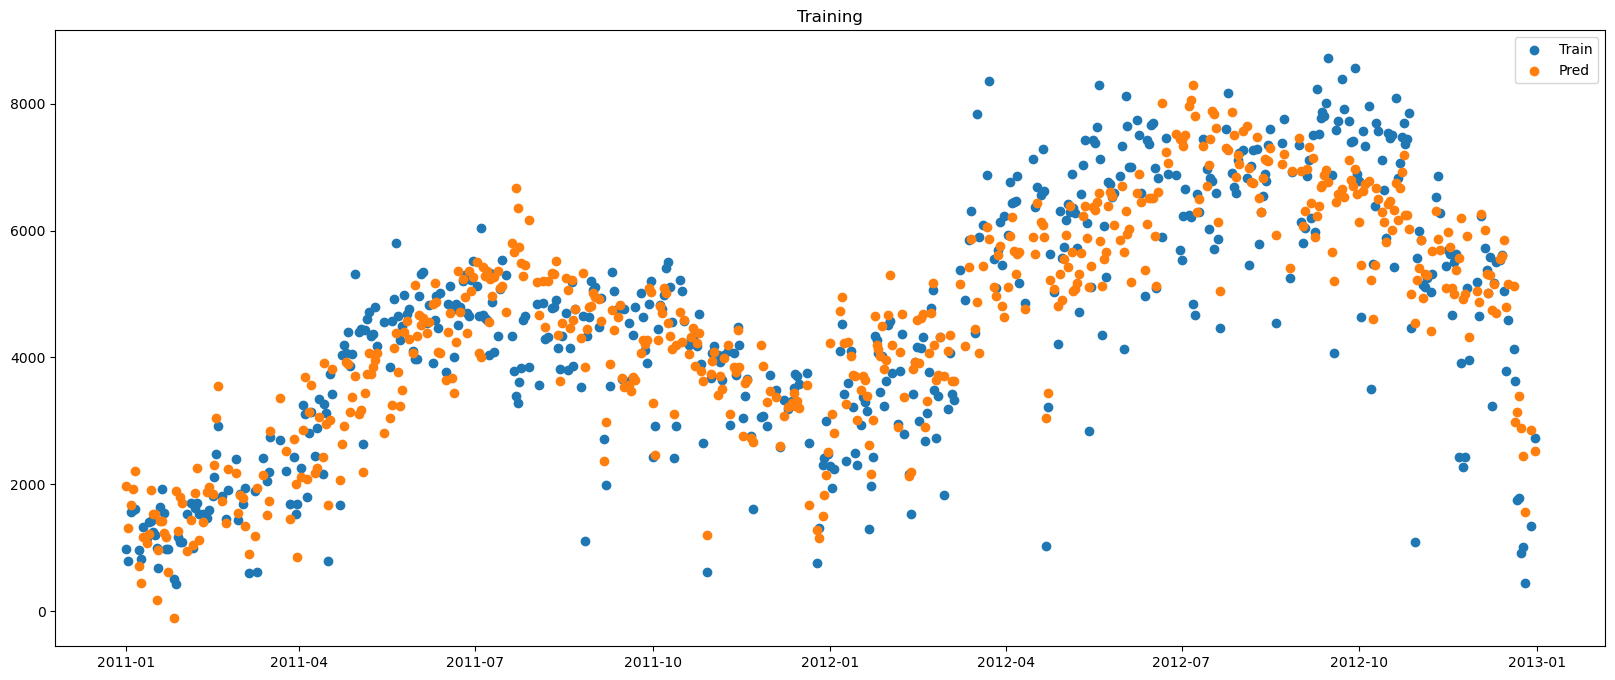

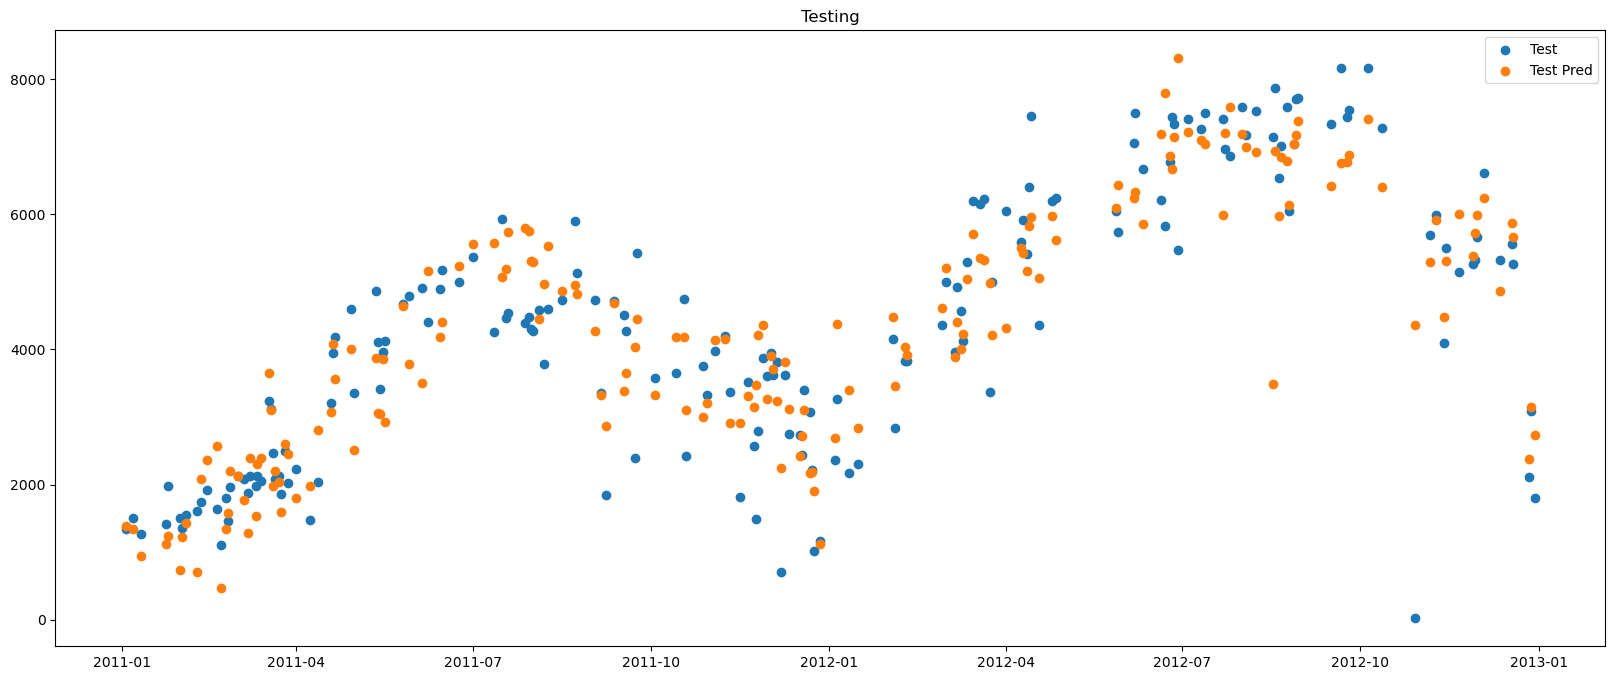

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.title('Training')
plt.scatter(df_bikes.loc[X_train.index,'dteday'], y_train, label='Train')
plt.scatter(df_bikes.loc[X_train.index,'dteday'], lin_reg.predict(X_train), label='Pred')
plt.legend()

plt.figure(figsize=(20,8))
plt.title('Testing')
plt.scatter(df_bikes.loc[X_test.index,'dteday'], y_test, label='Test')
plt.scatter(df_bikes.loc[X_test.index,'dteday'], lin_reg.predict(X_test), label='Test Pred')
plt.legend()


plt.show()

### 1.3.6 XGBRgressor

In [69]:
# XGBRegressor를 임포트합니다.
from xgboost import XGBRegressor

# XGBRegressor의 객체 xg_reg를 만듭니다.
xg_reg = XGBRegressor()

# 훈련 데이터로 xg_reg 객체를 훈련합니다.
xg_reg.fit(X_train, y_train)

# 테스트 세트의 레이블을 예측합니다.
y_pred = xg_reg.predict(X_test)

# 평균 제곱 오차를 계산합니다.
mse = mean_squared_error(y_test, y_pred)

# 평균 제곱근 오차를 계산합니다.
rmse = np.sqrt(mse)

# 평균 제곱근 오차를 출력합니다.
print("RMSE: %0.2f" % (rmse))
print('선형회귀보다 성능이 좋음')

RMSE: 662.92
선형회귀보다 성능이 좋음


### 1.3.7. XGBRegressor 결과 시각화

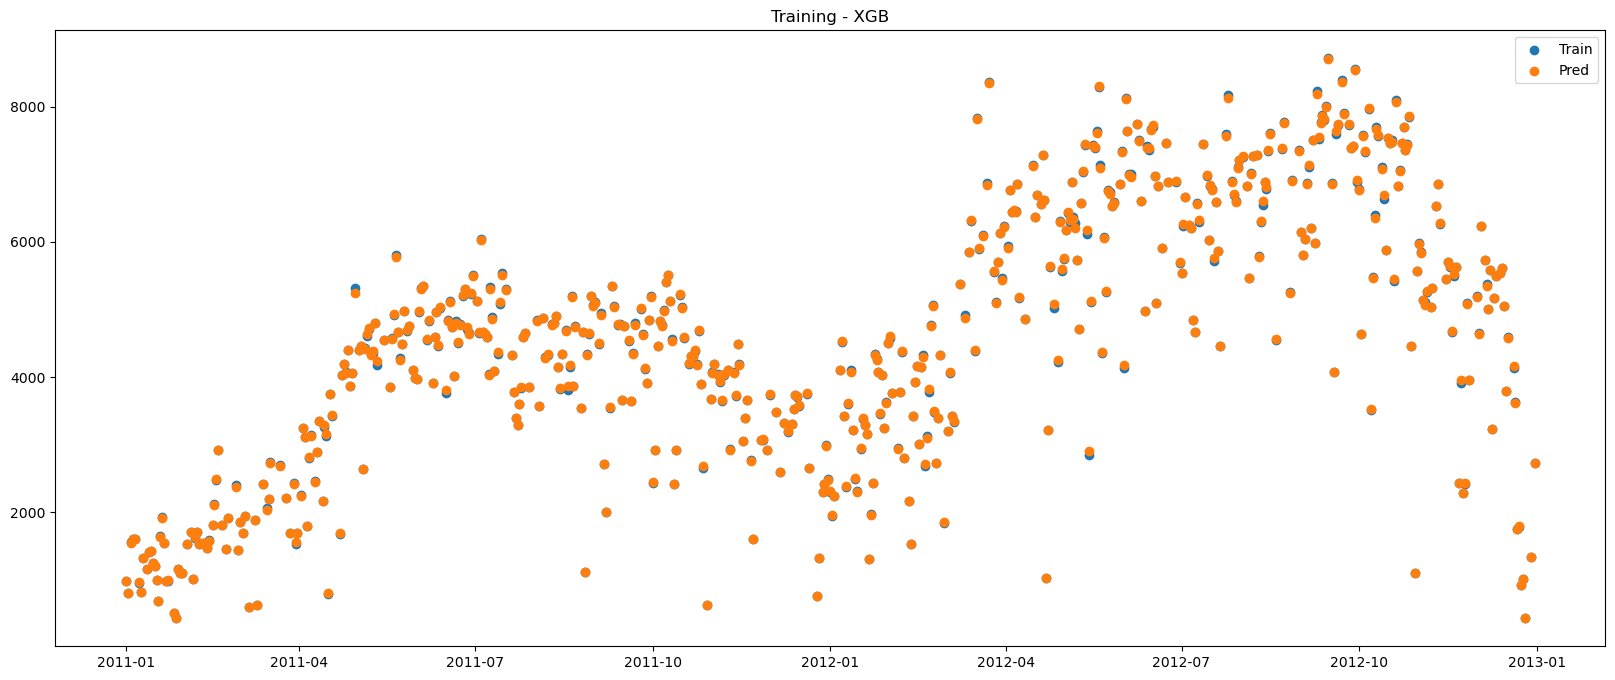

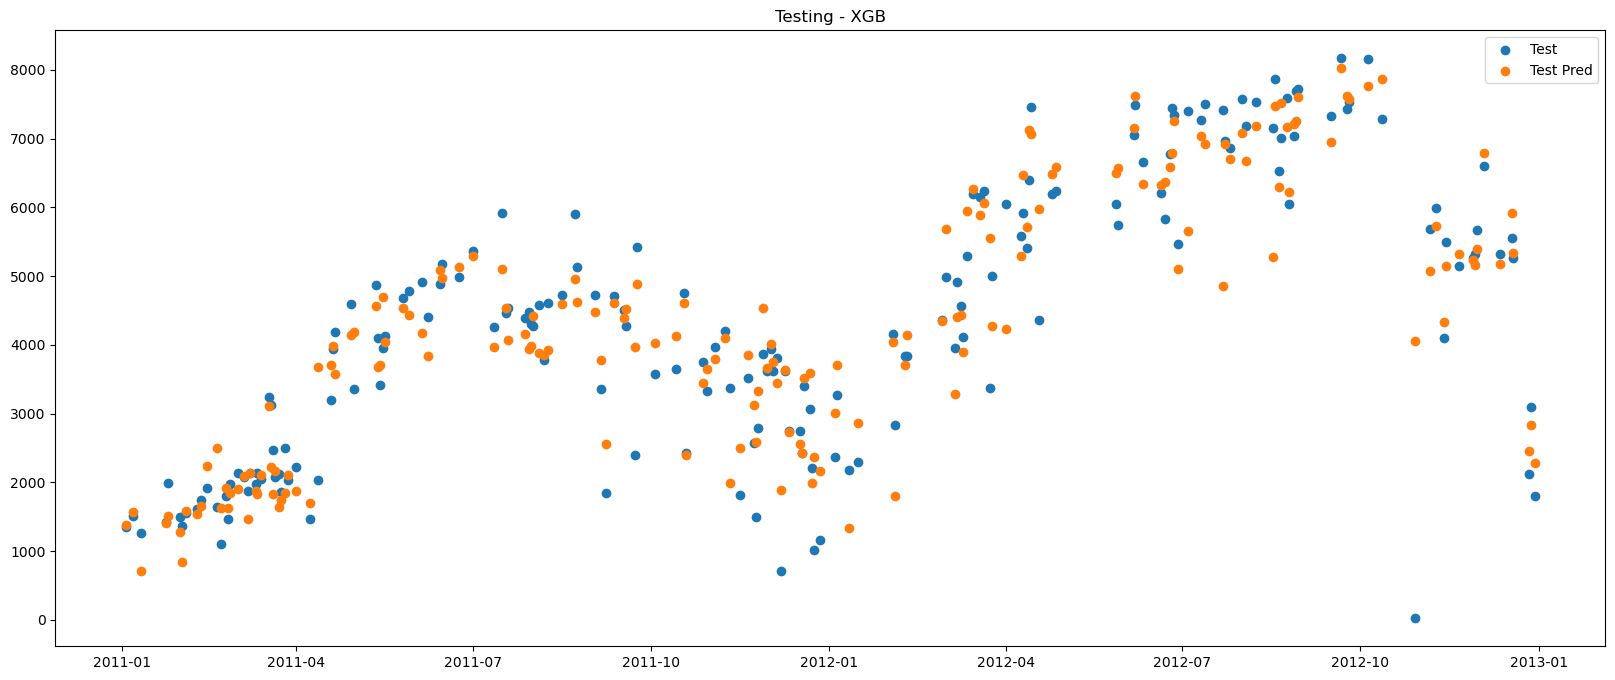

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.title('Training - XGB')
plt.scatter(df_bikes.loc[X_train.index,'dteday'], y_train, label='Train')
plt.scatter(df_bikes.loc[X_train.index,'dteday'], xg_reg.predict(X_train), label='Pred')
plt.legend()

plt.figure(figsize=(20,8))
plt.title('Testing - XGB')
plt.scatter(df_bikes.loc[X_test.index,'dteday'], y_test, label='Test')
plt.scatter(df_bikes.loc[X_test.index,'dteday'], xg_reg.predict(X_test), label='Test Pred')
plt.legend()


plt.show()

### 1.3.8. 교차검증
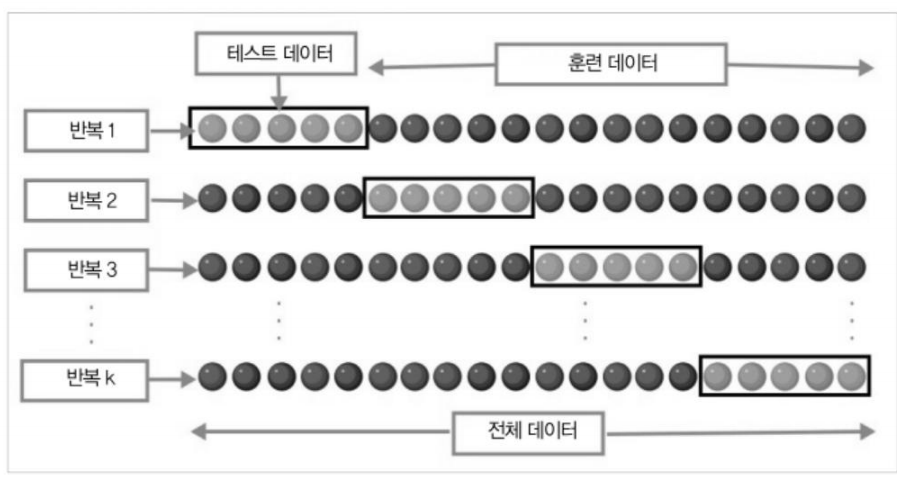

`cross_val_score()` 로 손쉽게 가능
+ sklearn은 훈련 시 **점수가 높은 것을 좋은 것**으로 간주하도록 loss 설정됨

### 1.3.9. 선형회귀 교차검증

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# LinearRegression 클래스 객체를 만듭니다.
model = LinearRegression()

# 10-폴드 교차 검증으로 평균 제곱 오차를 구합니다.
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)

# 이 점수의 제곱근을 계산합니다.
rmse = np.sqrt(-scores)

# 평균 제곱근 오차를 출력합니다.
print('회귀 rmse:', np.round(rmse, 2))

# 평균 점수를 출력합니다.
print('RMSE 평균: %0.2f' % (rmse.mean()))

회귀 rmse: [ 496.61  838.68 1148.73  727.85  627.42  947.77 1132.54 1253.18 1081.64
 1434.89]
RMSE 평균: 968.93


### 1.3.10. XGB 교차검증

In [77]:
# XGBRegressor를 임포트합니다.
from xgboost import XGBRegressor

# XGBRegressor의 객체 xg_reg를 만듭니다.
xg_reg = XGBRegressor()

# 10-폴드 교차 검증으로 평균 제곱 오차를 구합니다.
scores = cross_val_score(xg_reg, X, y, scoring='neg_mean_squared_error', cv=10)

# 평균 제곱근 오차를 계산합니다.
rmse = np.sqrt(-scores)

# 평균 제곱근 오차를 출력합니다.
print('XGB rmse:', np.round(rmse, 2))

# 평균 점수를 출력합니다.
print('RMSE 평균: %0.2f' % (rmse.mean()))

XGB rmse: [ 828.44  784.43  536.45  721.57  950.07 1226.73  965.86  846.49  843.48
 1331.83]
RMSE 평균: 903.54


## 1.4. 분류모델만들기

### 1.4.1. 데이터 가져오기
인구 조사 소득 데이터셋을 활용
+ **income** 컬럼을 분류하기

In [88]:
# UCI 머신러닝 저장소에서 인구 조사 데이터셋(adult)을 로드합니다.
df_census = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

# df_census 열 이름을 정의합니다.
df_census.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                  'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                   'income']

df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [81]:
df_census.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

### 1.4.2. 결측치

In [83]:
df_census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### 1.4.3. 열삭제
+ education & education_num 은 중복되므로 삭제

In [89]:
df_census = df_census.drop('education-num',axis=1)

### 1.4.4. 카테고리 to onehot
`pd.get_dummies()`

In [90]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [92]:
df_census.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [97]:
df_census_onehot = pd.get_dummies(df_census)
df_census_onehot

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
32557,40,154374,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
32558,58,151910,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
32559,22,201490,0,0,20,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


### 1.4.5. 데이터나누기

In [98]:
# 'income_ <=50K' 열을 삭제 : 50k이하가 0, 초과가 1이 됨
df_census_onehot = df_census_onehot.drop('income_ <=50K', axis=1)

# 데이터를 X와 y로 나눕니다.
X = df_census_onehot.iloc[:,:-1]
y = df_census_onehot.iloc[:,-1]

### 1.4.6. 모델링

**CV함수정의**

In [101]:
# classifier와 num_splits 매개변수를 가진 cross_val 함수를 정의합니다.
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
def cross_val(classifier, num_splits=10):
    
    # 분류 모델 생성
    model = classifier


    # Evaluate model with accuracy
    scores = cross_val_score(model, X, y, cv=num_splits, scoring='accuracy')
    print('Accuracy:', np.round(scores, 2))
    print("평균 Accuracy: ", scores.mean())

    # Evaluate model with precision
    scores = cross_val_score(model, X, y, cv=num_splits, scoring='precision_macro') # assuming multi-class
    print('Precision:', np.round(scores, 2))
    print("평균 Precision: ", scores.mean())

    # Evaluate model with recall
    scores = cross_val_score(model, X, y, cv=num_splits, scoring='recall_macro') # assuming multi-class
    print('Recall:', np.round(scores, 2))
    print("평균 Recall: ", scores.mean())

#     # 정확도 출력
#     print('정확도:', np.round(scores, 2))

#     # 평균 정확도 출력
#     print('평균 정확도: %0.2f' % (scores.mean()))

**로지스틱회귀**

In [104]:
from sklearn.linear_model import LogisticRegression
cross_val(LogisticRegression())

Accuracy: [0.8  0.8  0.79 0.8  0.79 0.81 0.79 0.8  0.8  0.8 ]
평균 Accuracy:  0.7977642748674374
Precision: [0.75 0.77 0.75 0.75 0.75 0.79 0.74 0.77 0.75 0.78]
평균 Precision:  0.7615553173384524
Recall: [0.61 0.61 0.61 0.62 0.61 0.63 0.61 0.62 0.62 0.62]
평균 Recall:  0.6156649782385282


**XGBClassifier**

In [105]:
from xgboost import XGBClassifier
cross_val(XGBClassifier(n_estimators=5))

Accuracy: [0.85 0.86 0.86 0.85 0.86 0.86 0.86 0.86 0.86 0.86]
평균 Accuracy:  0.8586655353542059
Precision: [0.81 0.83 0.84 0.83 0.83 0.82 0.84 0.84 0.84 0.83]
평균 Precision:  0.8315336510587858
Recall: [0.75 0.76 0.75 0.75 0.76 0.77 0.75 0.75 0.77 0.77]
평균 Recall:  0.7579210001358777
